# Automatidata project 
**Course 4 - The Power of Statistics**

You are a data professional in a data consulting firm, called Automatidata. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes your specific assignment: to conduct an A/B test. 

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# Course 4 End-of-course project: Statistical analysis

In this activity, you will practice using statistics to analyze and interpret data. The activity covers fundamental concepts such as descriptive statistics and hypothesis testing. You will explore the data provided and conduct A/B and hypothesis testing.  
<br/>   

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This activity has four parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing
* How did computing descriptive statistics help you analyze your data? 

* How did you formulate your null hypothesis and alternative hypothesis? 

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your A/B test?

* What business recommendations do you propose based on your results?

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 

# **Conduct an A/B test**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


==> ENTER YOUR RESPONSE HERE 

*Complete the following steps to perform statistical analysis of your data:* 

### Task 1. Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Before you begin, recall the following Python packages and functions that may be useful:

*Main functions*: stats.ttest_ind(a, b, equal_var)

*Other functions*: mean() 

*Packages*: pandas, stats.scipy

</details>

In [1]:
#==> ENTER YOUR CODE HERE
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [6]:
# Load dataset into dataframe
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Analyze and Construct**

In this stage, consider the following questions where applicable to complete your code response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


==> ENTER YOUR RESPONSE HERE 

### Task 2. Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [16]:
# Filter for Payment Types 1 (Credit Card) and 2 (Cash)
filtered_df = df[df['payment_type'].isin([1, 2])]

# Separate the data into two groups
credit_card_fares = filtered_df[filtered_df['payment_type'] == 1]['fare_amount']
cash_fares = filtered_df[filtered_df['payment_type'] == 2]['fare_amount']

# Descriptive statistics
print("Credit Card Fare Stats:")
print(credit_card_fares.describe())

print("\nCash Fare Stats:")
print(cash_fares.describe())

Credit Card Fare Stats:
count    15265.000000
mean        13.429748
std         13.848964
min          0.000000
25%          7.000000
50%          9.500000
75%         15.000000
max        999.990000
Name: fare_amount, dtype: float64

Cash Fare Stats:
count    7267.000000
mean       12.213546
std        11.689940
min         0.000000
25%         6.000000
50%         9.000000
75%        14.000000
max       450.000000
Name: fare_amount, dtype: float64


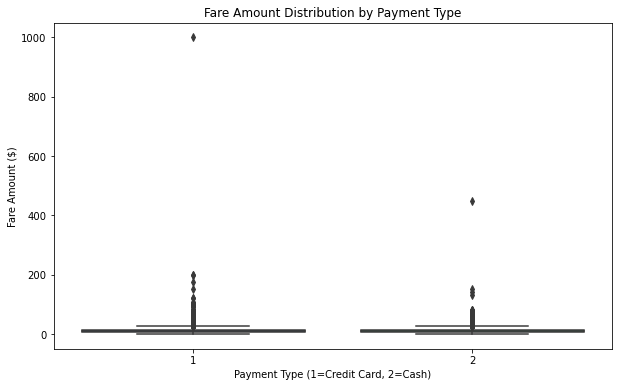

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='fare_amount', data=filtered_df, palette='viridis')
plt.title("Fare Amount Distribution by Payment Type")
plt.xlabel("Payment Type (1=Credit Card, 2=Cash)")
plt.ylabel("Fare Amount ($)")
plt.show()

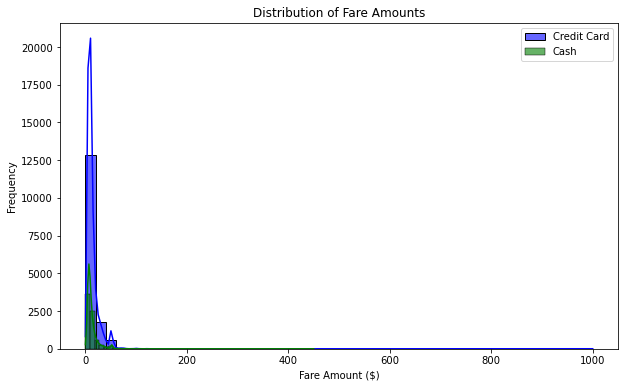

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_fares, color='blue', label='Credit Card', kde=True, bins=50, alpha=0.6)
sns.histplot(cash_fares, color='green', label='Cash', kde=True, bins=50, alpha=0.6)
plt.title("Distribution of Fare Amounts")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.


### Task 3. Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider your hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



**Note:** For the purpose of this exercise, your hypothesis test is the main component of your A/B test. 

You choose 5% as the significance level and proceed with a two-sample t-test.

In [22]:
#==> ENTER YOUR CODE HERE
t_statistic, p_value = ttest_ind(credit_card_fares, cash_fares, equal_var=False)

print("\nHypothesis Testing Results:")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.5f}")

# Step 8: Conclusion based on p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("There is a significant difference in fare amounts between Credit Card and Cash payments.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("There is no significant difference in fare amounts between Credit Card and Cash payments.")


Hypothesis Testing Results:
T-Statistic: 6.87
P-Value: 0.00000
Result: Reject the null hypothesis.
There is a significant difference in fare amounts between Credit Card and Cash payments.


==> ENTER YOUR DECISION TO ACCEPT OR REJECT THE NULL HYPOTHESIS

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4. Communicate insights with stakeholders

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?
2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.

==> ENTER YOUR RESPONSE HERE 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.